THE SPARKS FOUNDATION: DATA SCIENCE AND BUSINESS ANALYTICS 

TASK 1: PREDICTION USING SUPERVISED MACHINE LEARNING

DONE BY: SHIVANI KAKDE

OBJECTIVE OF TASK: TO PREDICT THE PERCENTAGE OF MARKS OF THE STUDENTS BASED ON THE NUMBER OF HOURS STUDIED.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset
data = pd.read_csv('Book1.csv')
print("DATA IMPORTED SUCCESSFULLY")

DATA IMPORTED SUCCESSFULLY


In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.shape

(25, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


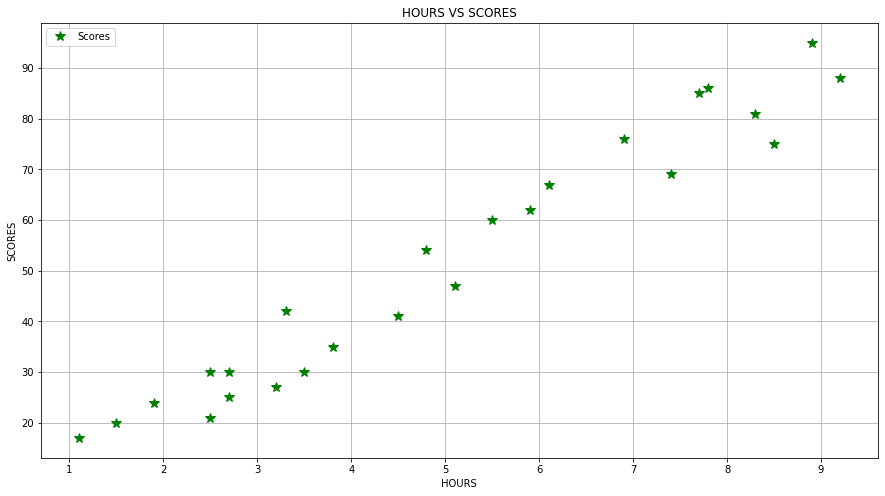

In [8]:
#Plotting the dataset
plt.rcParams["figure.figsize"] = [15,8]
data.plot(x='Hours',y='Scores',color='green', style='*', markersize='10')
plt.title("HOURS VS SCORES")
plt.xlabel("HOURS")
plt.ylabel("SCORES")
plt.grid()
plt.show()

In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Using train_test_split

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=0)

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)
print("MODEL TRAINED")

MODEL TRAINED


In [15]:
line = lr.coef_*X+lr.intercept_

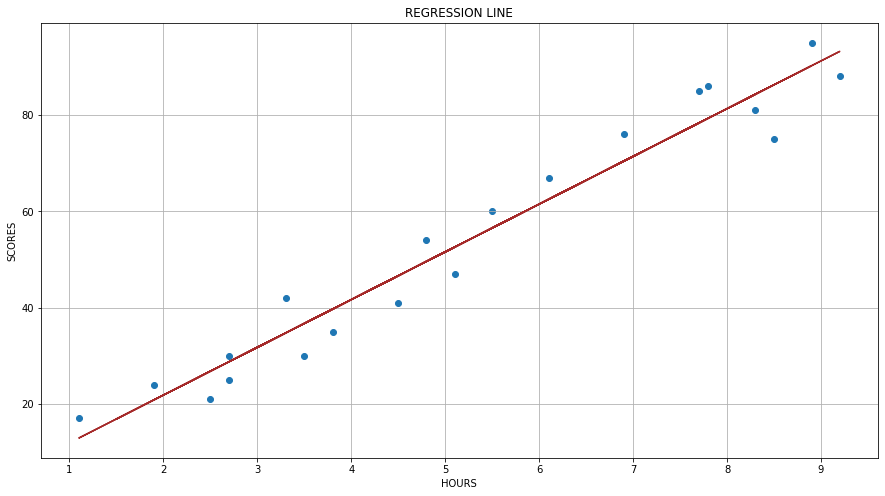

In [16]:
plt.rcParams["figure.figsize"] = [15,8]
plt.scatter(X_train,y_train)
plt.plot(X, line, color='brown')
plt.title('REGRESSION LINE')
plt.xlabel('HOURS')
plt.ylabel('SCORES')
plt.grid()
plt.show()

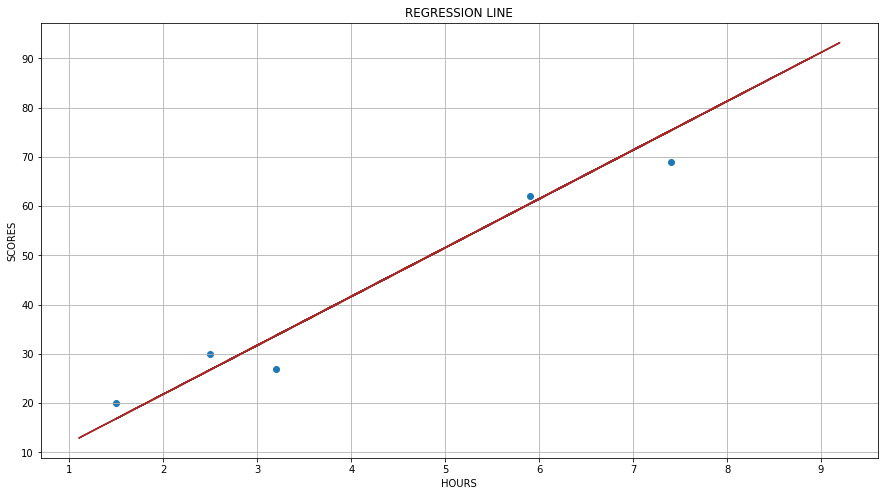

In [17]:
plt.rcParams["figure.figsize"] = [15,8]
plt.scatter(X_test,y_test)
plt.plot(X, line, color='brown')
plt.title('REGRESSION LINE')
plt.xlabel('HOURS')
plt.ylabel('SCORES')
plt.grid()
plt.show()

In [18]:
print(X_test)
y_pred = lr.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
print(y_test)

[20 27 69 30 62]


In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [22]:
hours =9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Scores = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Scores = 93.69173248737535


In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
